In [25]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Data Preparation & Exploration

In [3]:
# Read in csv and inspect data

nba_df = pd.read_csv('raw_data/NBA_POW_DATA.csv')
nba_df.head()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,"Apr 14, 1985",PG,6-5,189,29,1978,6,1984-1985,1985,1.0
1,0,Derek Smith,Los Angeles Clippers,NaN,"Apr 7, 1985",SG,6-6,205,23,1982,2,1984-1985,1985,1.0
2,0,Calvin Natt,Denver Nuggets,NaN,"Apr 1, 1985",F,6-6,220,28,1979,5,1984-1985,1985,1.0
3,0,Kareem Abdul-Jabbar,Los Angeles Lakers,NaN,"Mar 24, 1985",C,7-2,225,37,1969,15,1984-1985,1985,1.0
4,0,Larry Bird,Boston Celtics,NaN,"Mar 17, 1985",SF,6-9,220,28,1978,5,1984-1985,1985,1.0


In [4]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 14 columns):
Active season        1155 non-null int64
Player               1155 non-null object
Team                 1155 non-null object
Conference           771 non-null object
Date                 1155 non-null object
Position             1155 non-null object
Height               1155 non-null object
Weight               1155 non-null int64
Age                  1155 non-null int64
Draft Year           1155 non-null int64
Seasons in league    1155 non-null int64
Season               1155 non-null object
Season short         1155 non-null int64
Real_value           1155 non-null float64
dtypes: float64(1), int64(6), object(7)
memory usage: 126.4+ KB


## NBA Player of the Week (Avg. Age per Season)

In [5]:
# Finding out number of values in Age column
nba_df['Age'].value_counts()

25    147
28    129
27    127
26    121
24    118
23    101
29     79
30     72
31     57
22     57
32     42
33     30
21     25
34     15
20     11
35      8
37      5
36      3
38      3
40      2
19      2
39      1
Name: Age, dtype: int64

In [6]:
#Finding out how many years in Season column
nba_df['Season short'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019], dtype=int64)

In [7]:
#Create new df with season year and avg. age
nba_avg_age = nba_df.groupby('Season short')['Age'].mean().to_frame().reset_index()
nba_avg_age.head()

,Season short,Age
0,1985,27.000000
1,1986,26.695652
2,1987,27.130435
3,1988,26.173913
4,1989,26.478261


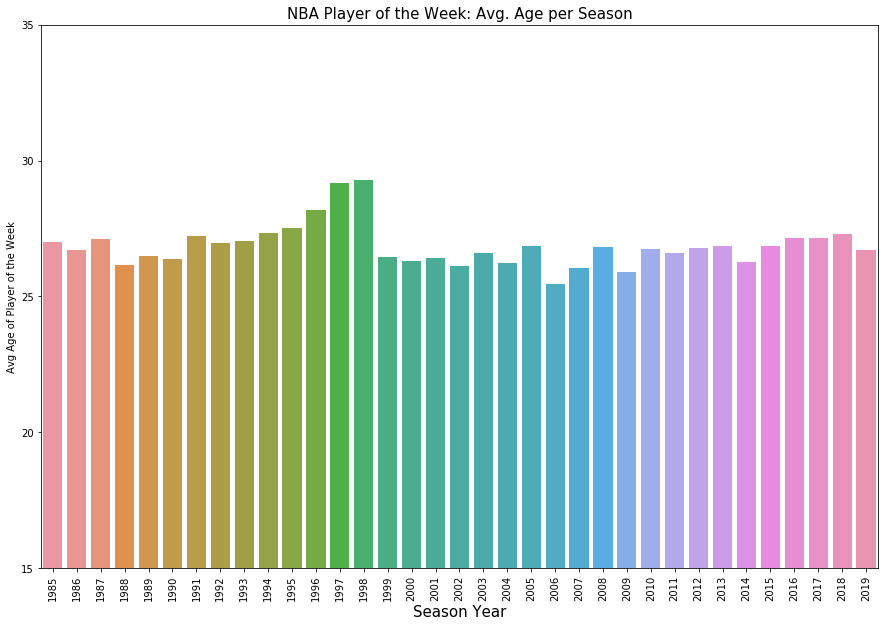

In [8]:
plt.figure(figsize = (15, 10))
sns.barplot(x = nba_avg_age['Season short'], y = nba_avg_age['Age'])

plt.xticks(rotation = 90)
plt.xlabel('Season Year', size = 15)
plt.yticks(np.arange(15, 40, step = 5))
plt.ylim(ymin = 15)
plt.ylabel('Avg Age of Player of the Week')
plt.title('NBA Player of the Week: Avg. Age per Season', size = 15)
plt.show()

## NBA Player of the Week (Top Ten)

In [9]:
nba_top_ten = nba_df.groupby('Player').agg({'Real_value':'sum'})\
                    .sort_values('Real_value',ascending = False).head(10).reset_index()

nba_top_ten['Rounded'] = nba_top_ten['Real_value'].astype(int)

nba_top_ten

,Player,Real_value,Rounded
0,LeBron James,30.5,30
1,Michael Jordan,24.0,24
2,Karl Malone,22.5,22
3,Kobe Bryant,17.5,17
4,Shaquille O'Neal,16.0,16
5,David Robinson,15.0,15
6,Tim Duncan,14.0,14
7,Allen Iverson,13.5,13
8,Kevin Durant,13.0,13
9,Kevin Garnett,12.5,12


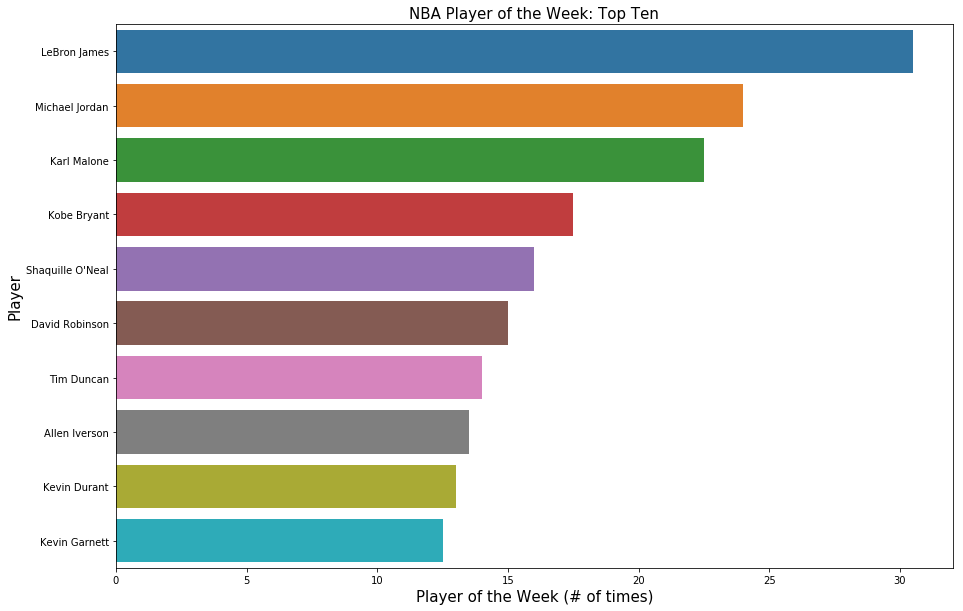

In [10]:
plt.figure(figsize = (15,10))
sns.barplot(x = nba_top_ten['Real_value'], y = nba_top_ten['Player'])
plt.xlabel('Player of the Week (# of times)', size = 15)
plt.ylabel('Player', size = 15)
plt.title('NBA Player of the Week: Top Ten', size = 15)
plt.show()

In [12]:
overall_pow = nba_df.groupby(['Player', 'Position'])['Real_value'].sum().reset_index()
overall_pow.head()

,Player,Position,Real_value
0,Aaron McKie,G,1.0
1,Adrian Dantley,SF,1.0
2,Al Harrington,F,0.5
3,Al Horford,FC,1.5
4,Al Jefferson,FC,3.5


In [30]:
overall_pow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 3 columns):
Player        276 non-null object
Position      276 non-null object
Real_value    276 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.5+ KB


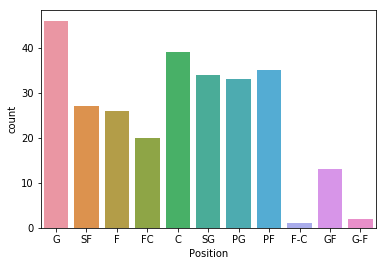

In [32]:
sns.countplot(overall_pow['Position'])